## 파생변수 더하기 전의 주당평균데이터
## 여기서 살펴볼 것은 이탈, 비이탈의 차이점을 보이는 피쳐 살피기

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("../3.통합/2.주당평균_기본/train_mean.csv")
test = pd.read_csv("../3.통합/2.주당평균_기본/test_mean.csv")

print(train.shape)
print(test.shape)
print("----------------------------")
print("----------------------------")
print(train.head())
print(test.head())
print("----------------------------")
print("----------------------------")
print(train.columns)
print(test.columns)

(100000, 76)
(40000, 75)
----------------------------
----------------------------
                                              acc_id     label  activated_wk  \
0  0000264b01392acfde44f9d8494f112a701dc5d3e5fda6...      week             2   
1  0001f130e89288ff0df167b998f6eb7085687f411fcb72...  retained             8   
2  00028f0ad71c07f48aef465fd0c98ba6e3f0f3de3d2f7d...  retained             5   
3  00036e5b6a197c196fa10fc0ad4e2853b22294dff64d27...     month             6   
4  00037fe8e712041a476b8b1b827583cbc34895844057f0...    2month             2   

   avg_cnt_dt  avg_play_time    avg_npc_exp  avg_npc_hongmun  avg_quest_exp  \
0    6.000000    7227.625000  205818.000000     41765.500000   1.370501e+07   
1    3.125000       1.637500       0.000000         0.000000   0.000000e+00   
2    2.400000       7.763333       5.600000         0.000000   1.722000e+03   
3    5.166667     267.033333    1626.333333      3919.166667   4.314633e+05   
4    1.500000      10.875000      14.0000

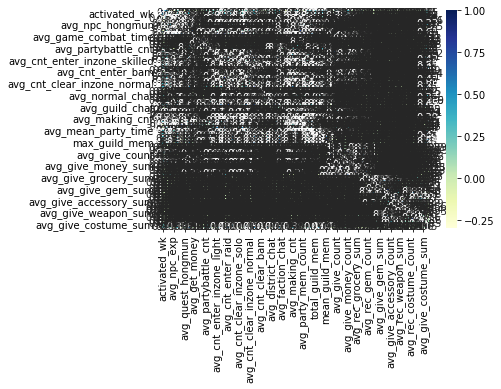

In [3]:
correlations = train.corr(method='pearson')
sns.heatmap(correlations, cmap="YlGnBu", annot = True)
plt.show()

## 상관계수 살펴보기

In [4]:
correlations_abs_sum = correlations.abs().sum()
correlations_abs_sum
print("낮은 것 10개")
print(correlations_abs_sum.nsmallest(10))
print("높은 것 10개")
print(correlations_abs_sum.nlargest(10))

낮은 것 10개
avg_gathering_cnt      1.483932
avg_district_chat      2.290004
avg_normal_chat        2.609871
avg_rec_weapon_sum     2.695351
avg_get_money          2.910659
avg_faction_chat       3.152414
avg_cnt_clear_bam      3.351464
avg_give_weapon_sum    3.363108
avg_duel_cnt           3.534052
avg_duel_win           3.720794
dtype: float64
높은 것 10개
avg_party_time                 18.997991
avg_play_time                  17.550591
avg_guild_chat                 16.889799
avg_game_combat_time           16.783719
avg_mean_party_mem             16.702934
avg_cnt_enter_raid             16.627394
avg_cnt_clear_raid             16.599026
avg_cnt_clear_inzone_normal    15.827150
avg_cnt_enter_inzone_normal    15.700580
avg_making_cnt                 15.552871
dtype: float64


### month와 2months간의 분포 차이가 매우 모호하다.
### 하지만 non_retained vs retained로 보면 유의미한 분포 차이를 보이는 피쳐들이 많이 보인다 
- playtime
- enter_light
- enter_raid
- whisper_chat
- party_chat
- guild_chat
- buff_item
- party_time
- party_member
- etc... 

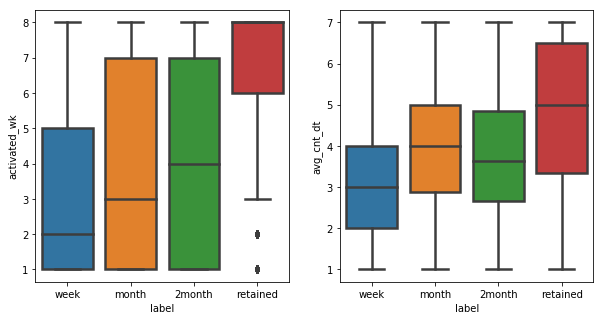

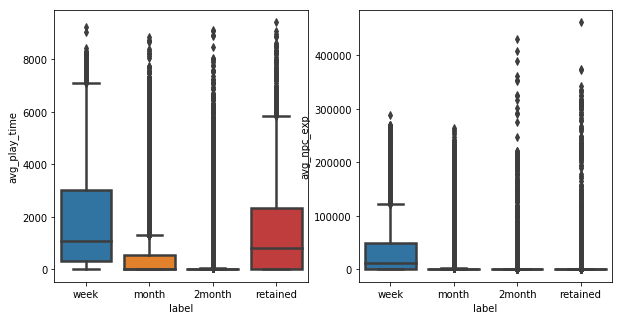

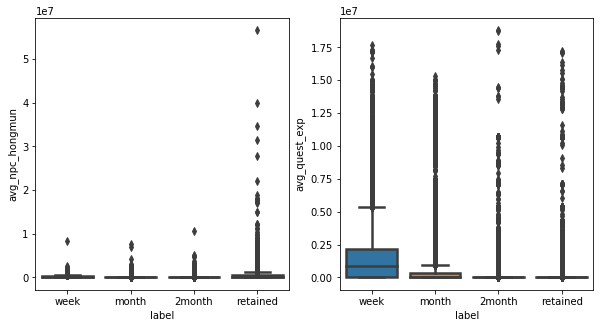

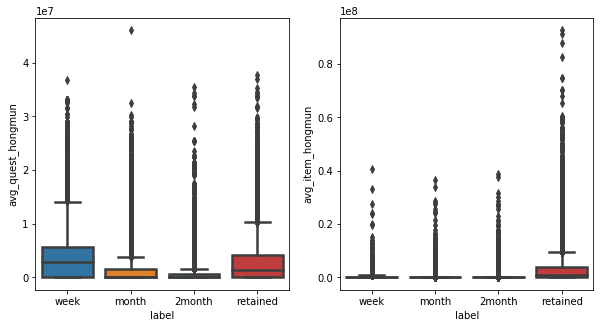

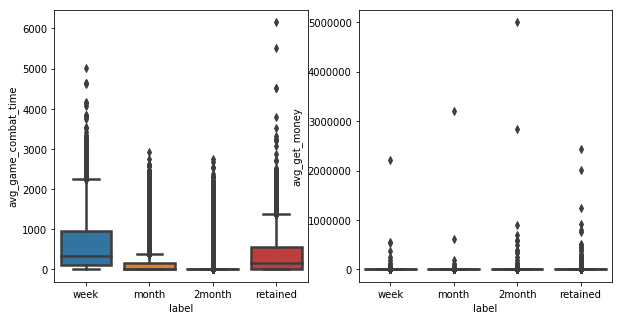

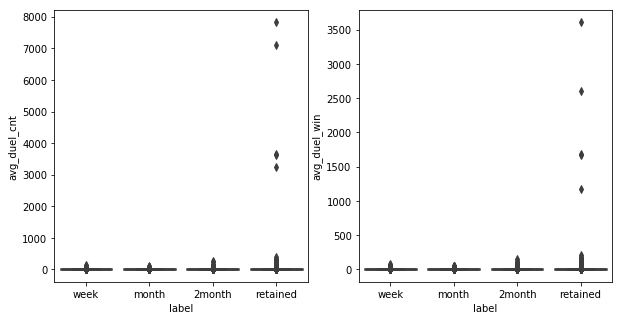

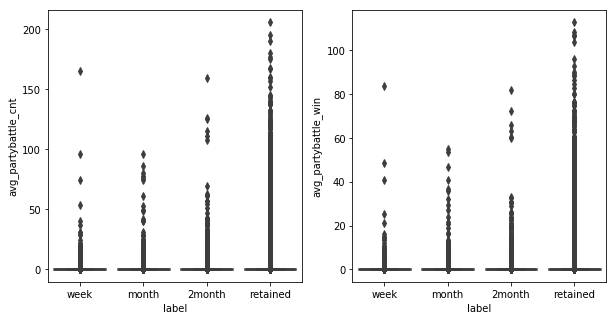

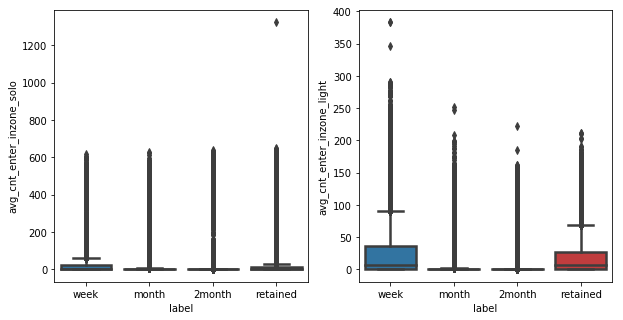

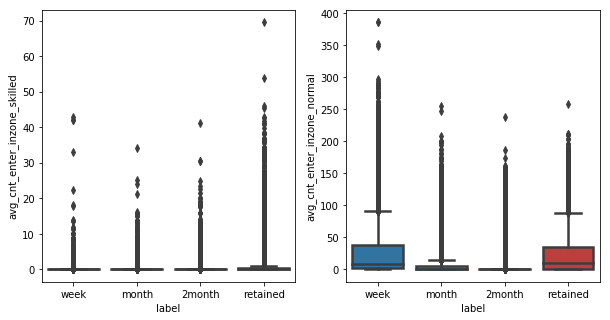

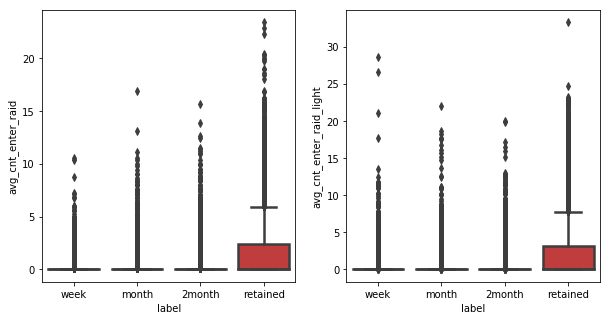

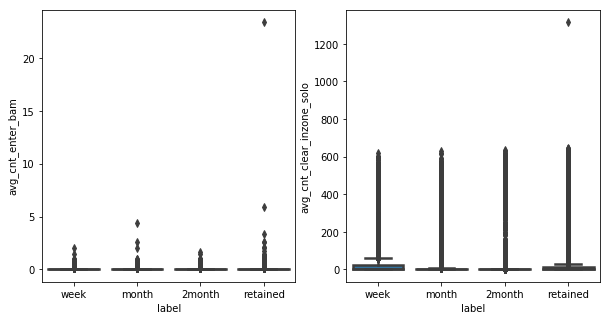

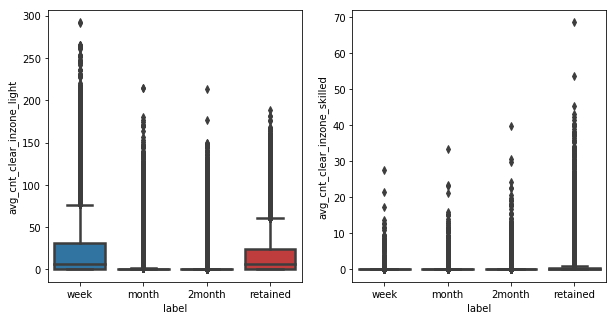

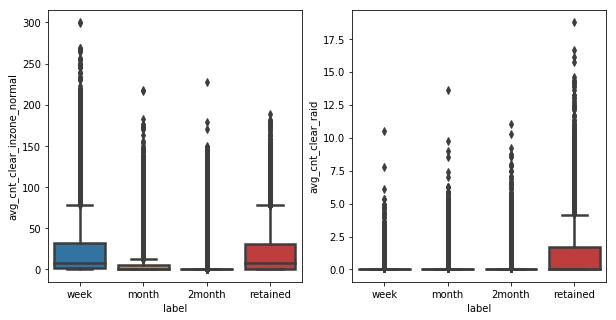

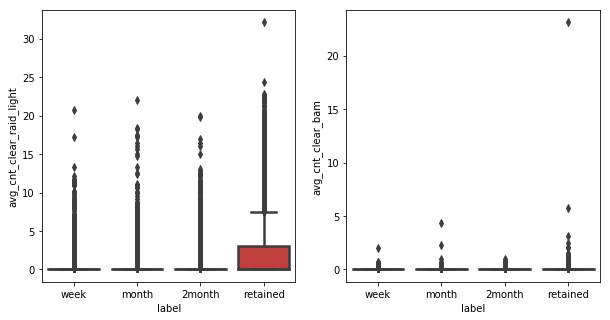

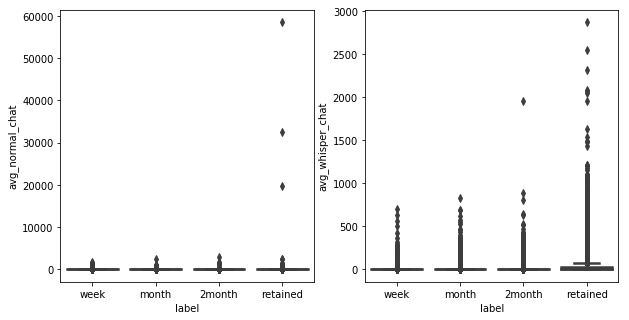

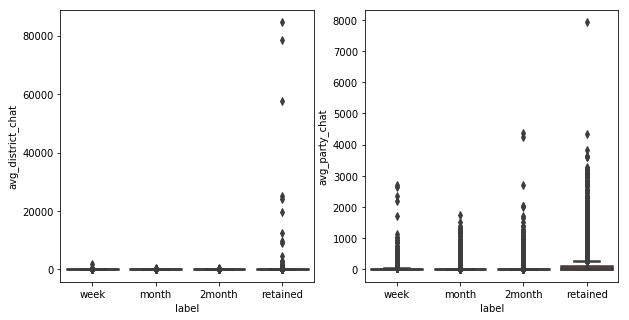

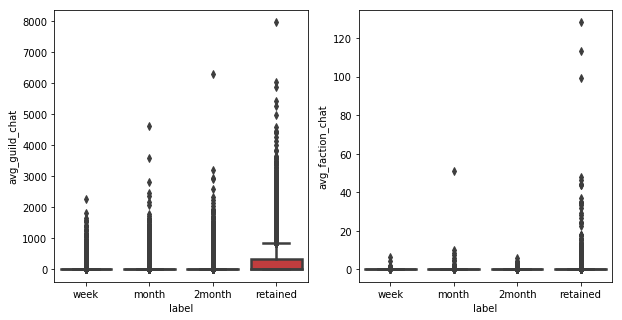

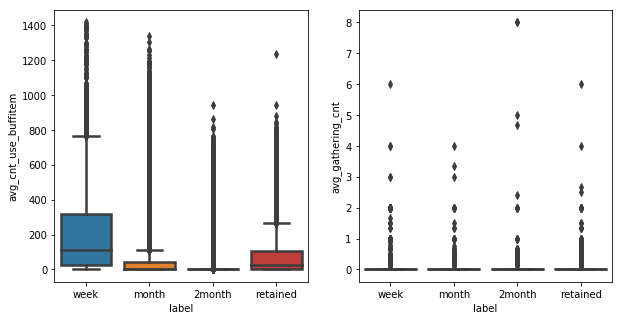

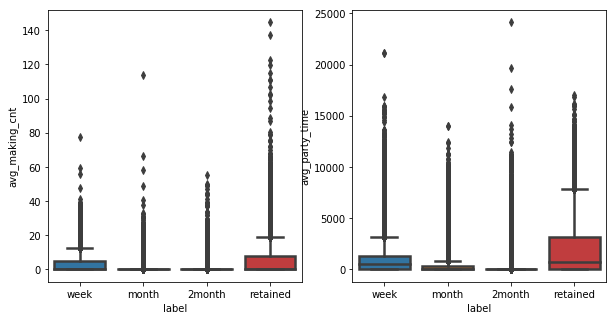

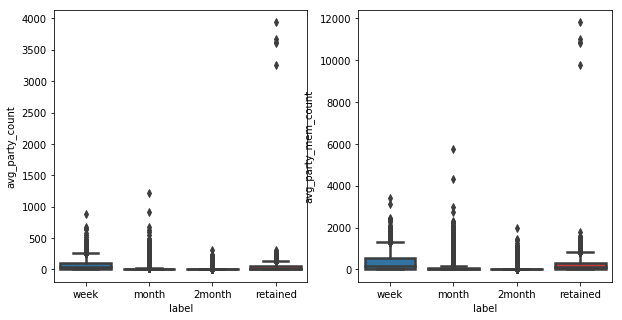

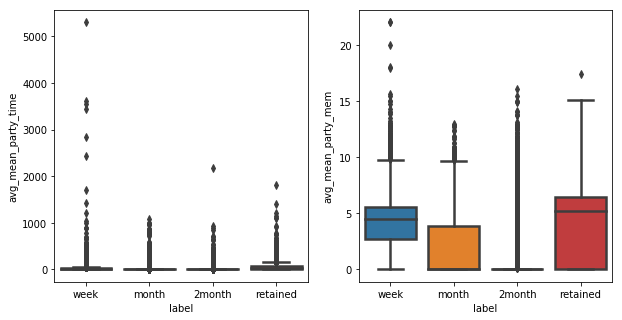

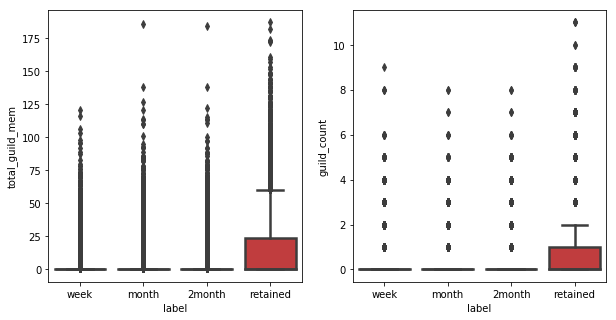

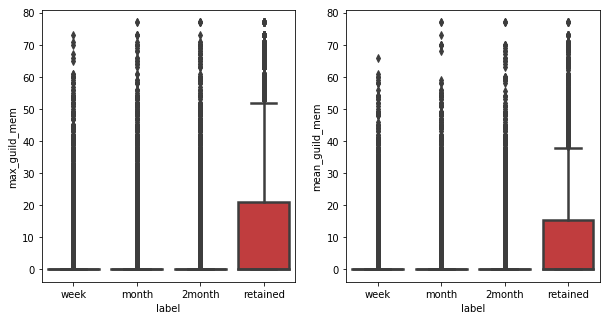

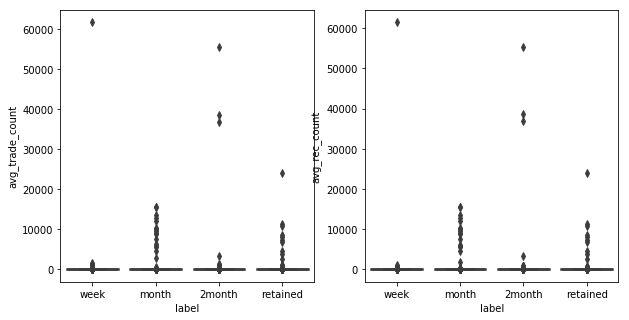

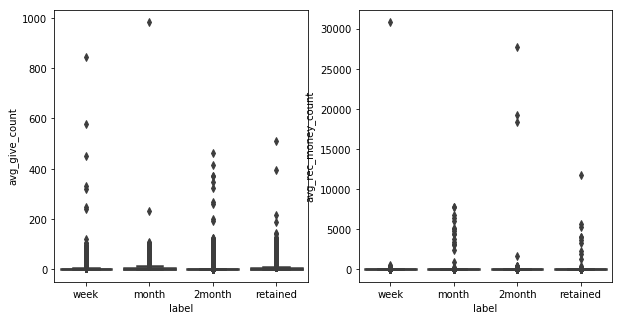

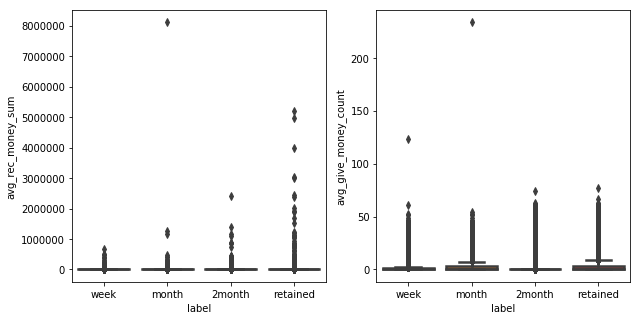

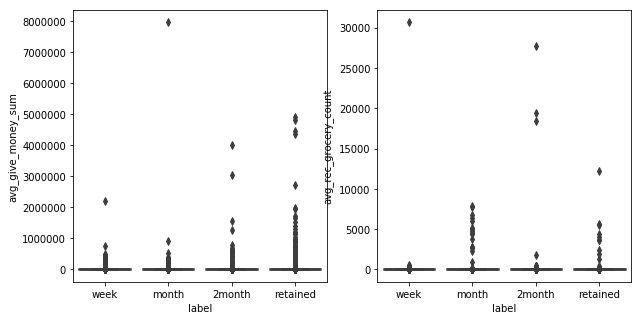

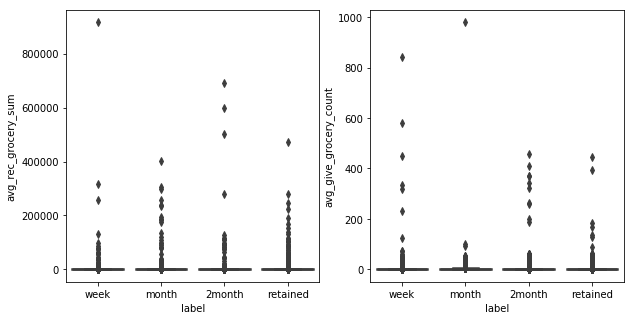

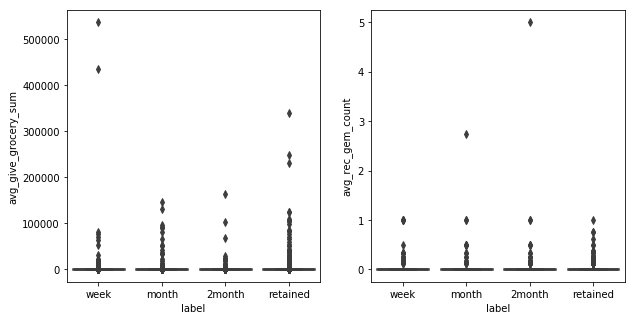

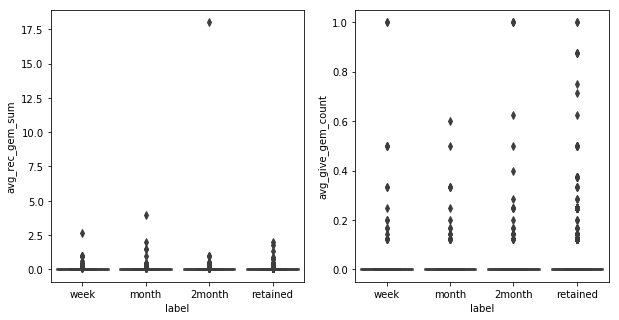

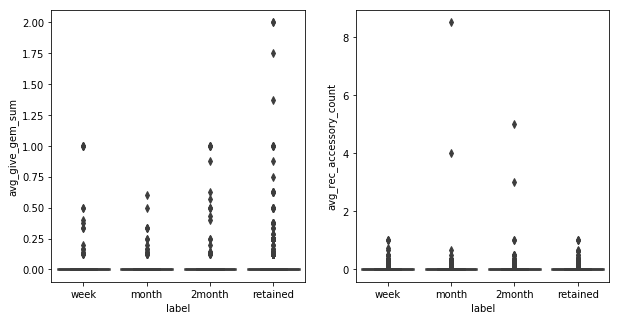

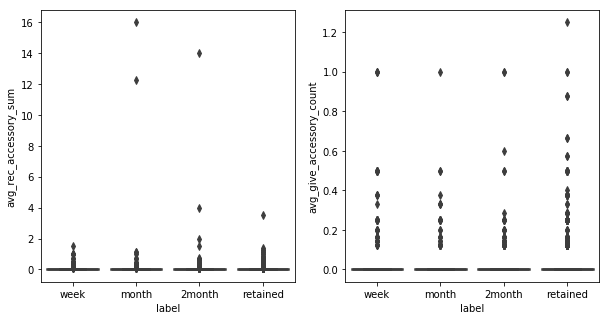

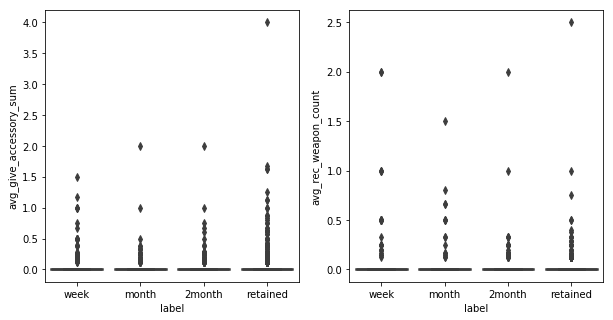

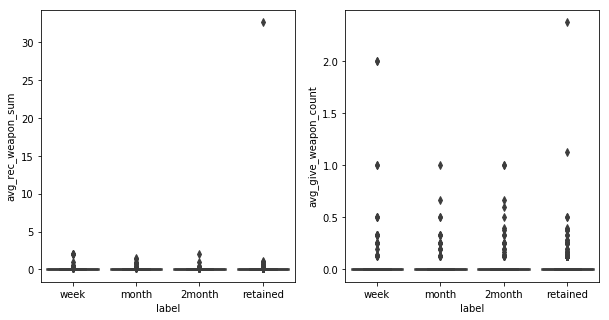

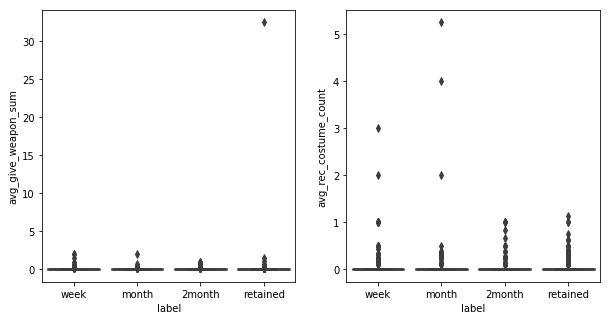

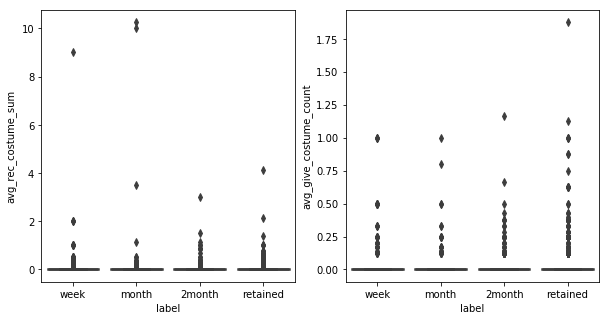

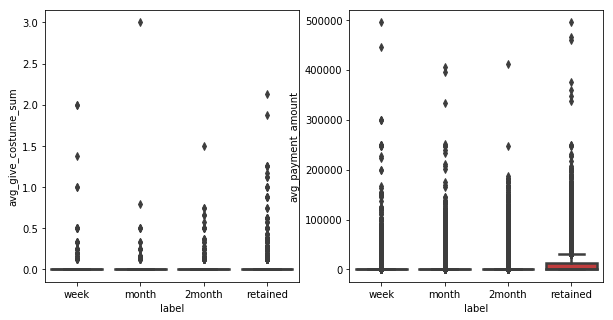

In [5]:
plt.rcParams["figure.figsize"] = (10, 5)
order = ["week", "month", "2month", "retained"]
for i in range(1, len(train.columns)//2):
    fig, axis = plt.subplots(ncols=2)
    sns.boxplot(x='label', y=train.columns[2*i], data=train, linewidth=2.5, ax=axis[0], order=order)
    sns.boxplot(x='label', y=train.columns[2*i+1], data=train, linewidth=2.5, ax=axis[1], order=order)
    plt.show()